In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random

#loading dataset
data = load_iris()
data_2d = data.data
species = data.target
feature = data.feature_names
species_name = data.target_names

X = np.copy(data_2d)
#adding column with ones for bias.
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
#adding result column for shuffling
X = np.insert(X, X.shape[1], values=species , axis=1)
#shuffle
np.random.shuffle(X)
#splitting input & output matrix
splitted = np.hsplit(X,np.array([5]))
X = splitted[0]
result = splitted[1]
total_entry = data_2d.shape[0]
#minibatch


In [ ]:
# 3 types of output vectors for 3 neurons
y = np.empty((3,150))

item_1 =np.array( np.where(result == 0 ,1 , 0))
item_2 = np.where(result == 1 ,1 , 0)
item_3 = np.where(result == 2 ,1 , 0)

item_1 = item_1.reshape(1,150)
item_2 = item_2.reshape(1,150)
item_3 = item_3.reshape(1,150)

y[0] = item_1
y[1] = item_2
y[2] = item_3



In [ ]:
def total_error_fun(x,w,neurons=3):
  total_e=0
  for i in range(neurons):
    E = sigmoid(np.dot(x,w[i]))-y[i]
    total_e += (np.dot(E,E.T)/total_entry)
  return total_e/neurons

def sigmoid(v):
    return 1.0 / (1 + np.exp(-v))

def accuracy_fun(x,w,neurons=3):
  total_correct_pred = 0
  y_pred_0 = sigmoid(np.dot(x,w[0]))
  print(y_pred_0.shape)
  print(item_1.shape)
  y_pred_1 = sigmoid(np.dot(x,w[1]))
  y_pred_2 = sigmoid(np.dot(x,w[2]))
  y_pred_0 = np.round(y_pred_0)
  y_pred_1 = np.round(y_pred_1)
  y_pred_2 = np.round(y_pred_2)
  # if y_pred_0[item] == y[0][item] and y_pred_1[item] == y[1][item] and y_pred_2[item] == y[2][item]:
  for item in range(total_entry):
    if y_pred_0[item] == item_1.reshape(150,1)[item] and y_pred_1[item] == item_2.reshape(150,1)[item] and y_pred_2[item] == item_3.reshape(150,1)[item]:
      total_correct_pred += 1
  
  return round(total_correct_pred/total_entry*100)
    
  

[[ 0.24262019  0.32906874  1.32065615 -1.98401488 -0.86339682]
 [-0.14067969 -0.05469218 -0.54584227  0.48712285 -0.43488601]
 [-0.55303655 -0.9668069  -1.25760713  1.65042718  1.32963192]]


(150,)
(1, 150)
61  % accuracy with learning rate  0.05   after  500  iterations
Single Layer Perceptron : 


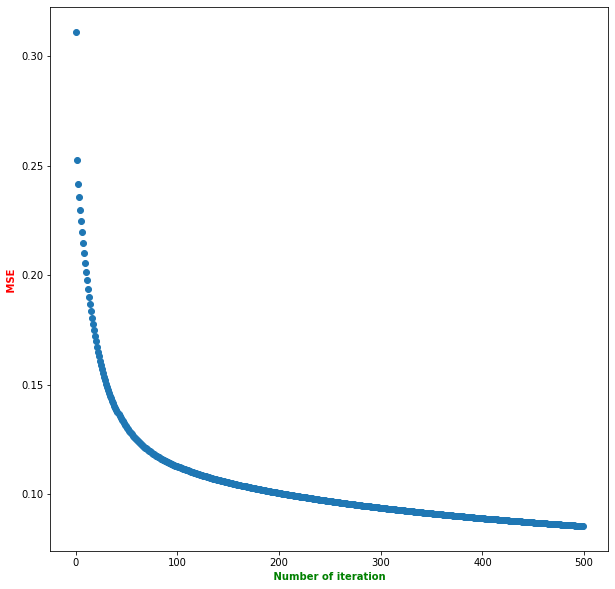

In [ ]:
max_iterations = 500
eta = 0.05
x_iterations = np.arange(0,max_iterations,1)

w1 = np.array([0.01 , -0.03 , 0.09 , -0.02 , 0.025 ])
w2 = np.array([-0.25 , -0.04 , 0.9 , -0.04 , 0.054  ])
w3 = np.array([0.04 , 0.5 , -0.06 , 0.01 , -0.07 ])
mse = []
class_level = 3
W = np.empty((3,5))

for it in range(max_iterations):
  # for level in range(class_level):

  y_pred = sigmoid(np.dot(X,w1))
  w1 -= (eta*(np.dot(y_pred-item_1,X))/total_entry).reshape(5,)
  

  y_pred = sigmoid(np.dot(X,w2))
  w2 -= (eta*(np.dot(y_pred-item_2,X))/total_entry).reshape(5,)
  

  y_pred = sigmoid(np.dot(X,w3))
  w3 -= (eta*(np.dot(y_pred-item_3,X))/total_entry).reshape(5,)

  W[0] = w1
  W[1] = w2
  W[2] = w3

  mse.append(total_error_fun(X,W))

mse_numpy = np.array(mse)
print(W)


plt.figure(figsize=(10,10))
plt.scatter(x_iterations,mse_numpy)
plt.xlabel(' Number of iteration ',color='green',fontweight='bold')
plt.ylabel(" MSE  ",color='red',fontweight='bold')

print('\n')
print(accuracy_fun(X,W) , ' % accuracy with learning rate ',eta , '  after ' , max_iterations , ' iterations')
print('Single Layer Perceptron : ')

[[ 0.14397637  0.1641101   0.79601521 -1.19422675 -0.50873445]
 [-0.32956328 -0.3900899   0.09031045  0.41873653  0.08449174]
 [-0.24206208 -0.31673274 -0.81695406  0.75709224  0.50118162]]


(150,)
(1, 150)
60  % accuracy with learning rate  0.05   after  500  iterations
Single Layer Perceptron with mini batch : 


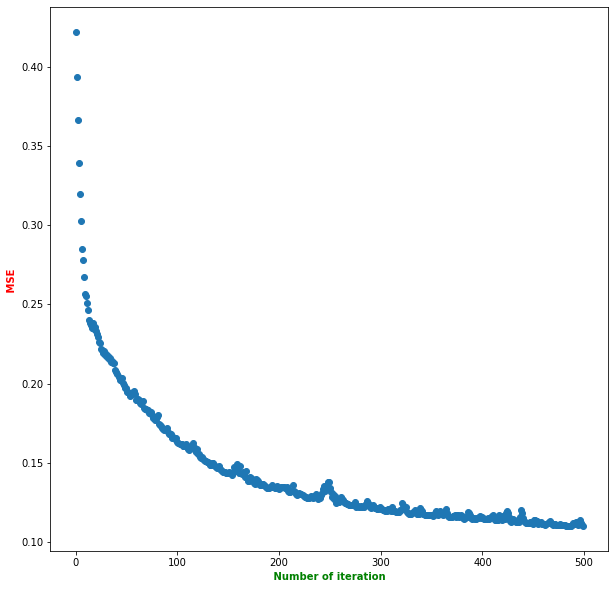

In [ ]:
total_batches = 25
X_M = np.vsplit(X,total_batches)
# print(X_minibatches)
#minibatch
y_M = np.hsplit(y,total_batches)

max_iterations = 500
eta = 0.05
x_iterations = np.arange(0,max_iterations,1)
W_M = np.empty((3,5))

w_m_1 = np.array([0.01 , -0.03 , 0.09 , -0.02 , 0.025 ])
w_m_2 = np.array([-0.25 , -0.04 , 0.9 , -0.04 , 0.054  ])
w_m_3 = np.array([0.04 , 0.5 , -0.06 , 0.01 , -0.07 ])
mse_minibatch = []

for i in range(max_iterations):
  mini = random.randint(0,total_batches-1)

  y_pred = sigmoid(np.dot(X_M[mini],w_m_1))
  w_m_1 -= (eta*(np.dot(y_pred-y_M[mini][0],X_M[mini]))/total_batches)

  y_pred = sigmoid(np.dot(X_M[mini],w_m_2))
  w_m_2-= (eta*(np.dot(y_pred-y_M[mini][1],X_M[mini]))/total_batches)

  y_pred = sigmoid(np.dot(X_M[mini],w_m_3))
  w_m_3 -= (eta*(np.dot(y_pred-y_M[mini][2],X_M[mini]))/total_batches)

  W_M[0] = w_m_1
  W_M[1] = w_m_2
  W_M[2] = w_m_3
  mse_minibatch.append(total_error_fun(X,W_M))


mse_minibatch_numpy = np.array(mse_minibatch)
print(W_M)

plt.figure(figsize=(10,10))
plt.scatter(x_iterations,mse_minibatch_numpy)
plt.xlabel(' Number of iteration ',color='green',fontweight='bold')
plt.ylabel(" MSE  ",color='red',fontweight='bold')

print('\n')
print(accuracy_fun(X,W_M) , ' % accuracy with learning rate ',eta , '  after ' , max_iterations , ' iterations')
print('Single Layer Perceptron with mini batch : ')

[[ 0.23251517  0.34794459  1.3139779  -2.04119853 -0.88533383]
 [-0.07528656  0.00524962 -0.22257275  0.66767001 -0.35482898]
 [-0.65802906 -1.15760487 -1.33221335  1.87503164  1.54693667]]


(150,)
(1, 150)
38  % accuracy with learning rate  0.05   after  500  iterations
Single Layer Perceptron with Stochastic Gradient Descent : 


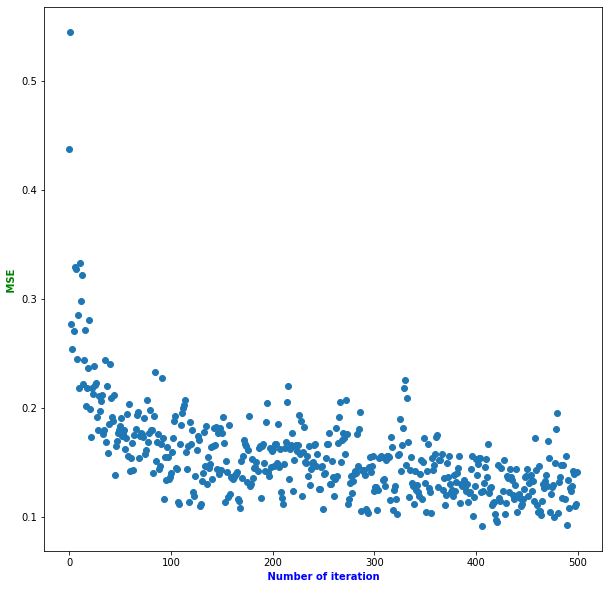

In [ ]:
max_iterations = 500
eta = 0.05
x_iterations = np.arange(0,max_iterations,1)


w_s_1 = np.array([0.01 , -0.03 , 0.09 , -0.02 , 0.025 ])
w_s_2 = np.array([-0.25 , -0.04 , 0.9 , -0.04 , 0.054  ])
w_s_3 = np.array([0.04 , 0.5 , -0.06 , 0.01 , -0.07 ])

mse_stochastic = []
W_S = np.empty((3,5))

for it in range(max_iterations):
  # for neuron in range(3):
  r = random.randint(0,total_entry-1)
  y_pred = sigmoid(np.dot(X[r], w_s_1))
  w_s_1 -= (eta*(np.dot(y_pred-y[0][r],X[r])))

  r = random.randint(0,total_entry-1)
  y_pred = sigmoid(np.dot(X[r], w_s_2))
  w_s_2 -= (eta*(np.dot(y_pred-y[1][r],X[r])))

  r = random.randint(0,total_entry-1)
  y_pred = sigmoid(np.dot(X[r], w_s_3))
  w_s_3 -= (eta*(np.dot(y_pred-y[2][r],X[r])))

  W_S[0] = w_s_1
  W_S[1] = w_s_2
  W_S[2] = w_s_3

  mse_stochastic.append(total_error_fun(X,W_S))

mse_stochastic_numpy = np.array(mse_stochastic)
print(W_S)

plt.figure(figsize=(10,10))
plt.scatter(x_iterations,mse_stochastic_numpy)
plt.xlabel(' Number of iteration ',color='blue',fontweight='bold')
plt.ylabel(" MSE  ",color='green',fontweight='bold')

print('\n')
print(accuracy_fun(X,W_S) , ' % accuracy with learning rate ',eta , '  after ' , max_iterations , ' iterations')
print('Single Layer Perceptron with Stochastic Gradient Descent : ')

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent.

Since we are considering just one example at a time the cost will fluctuate over the training examples and it will not necessarily decrease. But in the long run, you will see the cost decreasing with fluctuations.

Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw. So, after creating the mini-batches of fixed size, we do the following steps in one epoch:

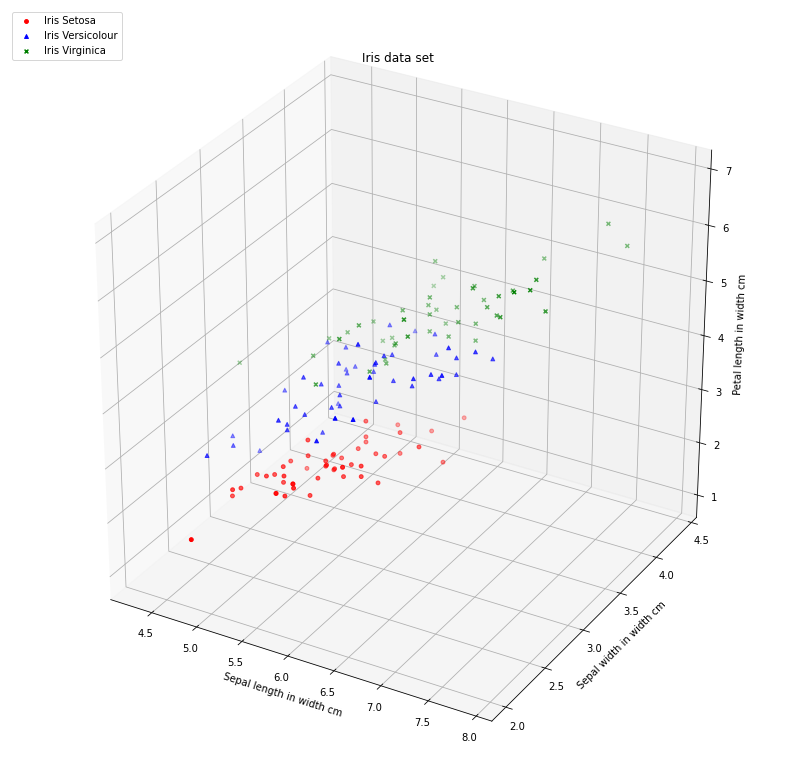

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

x = df.iloc[0:150,[0, 1, 2, 3]].values
y = data.target

x_train = np.empty((120, 4))
x_test = np.empty((30, 4))
y_train = np.empty(120)
y_test = np.empty(30)
x_train[:40],x_train[40:80],x_train[80:] = x[:40],x[50:90],x[100:140]
x_test[:10],x_test[10:20],x_test[20:] = x[40:50],x[90:100],x[140:]
y_train[:40],y_train[40:80],y_train[80:] = y[:40],y[50:90],y[100:140]
y_test[:10],y_test[10:20],y_test[20:] = y[40:50],y[90:100],y[140:]

x_train[:,1]
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection='3d')

ax.set_title('Iris data set')
ax.set_xlabel("Sepal length in width cm")
ax.set_ylabel("Sepal width in width cm")
ax.set_zlabel("Petal length in width cm")

ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red', marker='o', s=15, edgecolor='red', label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue',marker='^', s=15, edgecolor='blue', label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green', marker='x', s=15, edgecolor='green', label="Iris Virginica")

plt.legend(loc='upper left')
plt.show()

